# Pet Prediction

## Introduction

This is the notebook corresponding with git repo: [pet prediction](https://github.com/snenenenenenene/pet-prediction)

It happens more often than not - especially to animal & pet lovers such as myself - that you come across the most beautiful dog while going for a walk in the park -- or whenever you're mindlessly scrolling Facebook for hours. This project is a digitalised manifestation of your gung ho dog breed connoisseur from around the corner. How? Through the means of **Machine Learning** (ML).
The vast majority of blood, sweat and tears spent on researching and implementing the trained model will be documented by the use of the **Jupyter Notebook** you're currently reading.
Nevertheless, to take into account the target audience and pragmatism of this implementation, I have chosen to pair the aforementioned notebook with a frontend developed in React in order to evade the convoluted process of having to manually import images into the model -- which is still an option if you're into self-loathing.

The dataset used in this project is the [Animal Breed - Cats and Dogs](https://www.kaggle.com/imsparsh/animal-breed-cats-and-dogs) dataset from Kaggle.

## Imports

Your usual myriad of ML libraries were imported in this project such as:
- Numpy (Arrays & matrices) 
- Pandas (Manage the arrays)
- OS (Communication between your filesystem and python)
- Matplotlib (Plotting graphs)
- Tensorflow & Keras (Machine Learning)

Other than these I have also imported some lesser known libraries, and modules especially, to adapt to the specific circumstances of this project. These being:
- Preprocessing.image (Loading in images and transforming them into tensors)
- Sklearn.metrics (Visualising & reporting the model's performance & efficiency)
- Tensorflowjs (Exporting to a Javascript compatible model)

In [11]:
import numpy as np
import os
import json
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split
import tensorflowjs as tfjs
from keras.models import Sequential
from keras.layers import Dense, Input, Activation, Flatten
from tensorflow import keras
from tensorflow.keras.applications import DenseNet121

## Setup and Exploration

**IMPORTANT!** For this project to work you have to add the TRAIN and TEST folder from the Kaggle dataset to the breeds/ folder inside the root of this project.

Because this machine learning project is entirely based around classifying images, there won't be as much of a focus on exploration nor will there be a lot of cleaning, if any at all. 
I will assume all images are in their respective pet folders -- and after having checked it briefly i can confirm it being as such.
 

In order to adhere to coding conventions and to avoid confusion further on in the project I have tactically split up the setup part of my code from the rest in order to declare some constants and to initialise the mapping as well as the reverse mapping which will we'll take under the loop a bit farther down the project. 

In [12]:
TRAIN = 'breeds/TRAIN'
TEST = 'breeds/TEST'
IMAGE_HEIGHT = 256
IMAGE_WIDTH = 256
EPOCH_CNT = 5

test=[]
testfile=[]
dataset=[] 
name=[]
count=0
pet_dict=[]

Name = os.listdir(TRAIN)
N=list(range(len(Name)))
mapping = dict(zip(Name, N))
reverse_mapping = dict(zip(N, Name))

Here I laid out all the different breeds this Tensorflow model will be able to classify.
There's a great deal of cats (8) with the rest being dogs (29).

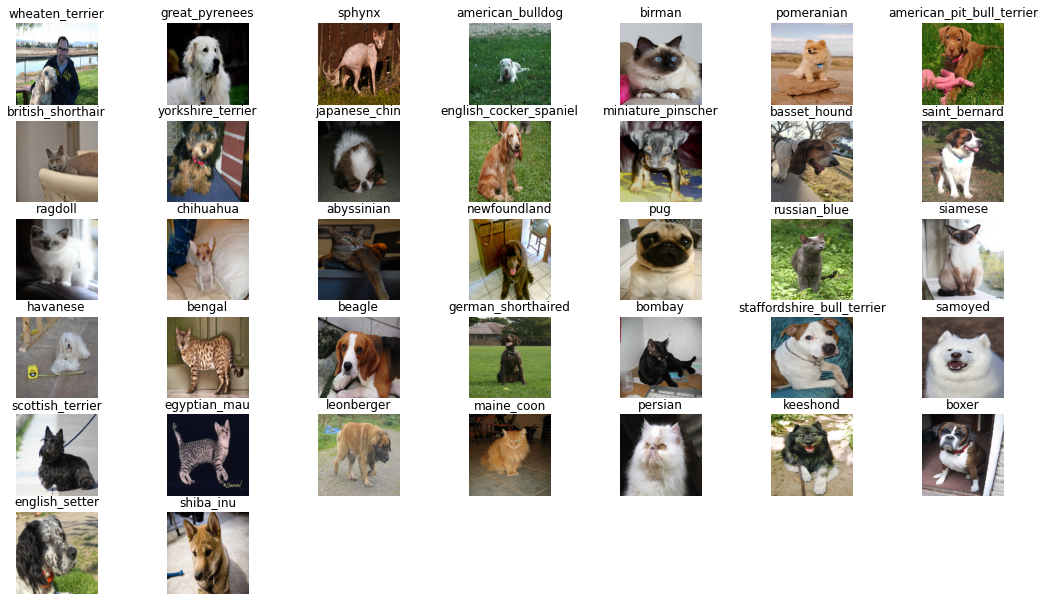

In [13]:
for i,j in enumerate(Name):
    ax = plt.subplot(6, 7, i + 1)
    image=load_img(f"breeds/TRAIN/{j}/1.jpg",target_size=(256,256))
    fig = plt.gcf()
    plt.title(j)
    plt.axis('off')
    fig.set_size_inches(18.5, 10.5)
    plt.imshow(image)
    
plt.show()


## Data Cleaning & Processing



As mentioned previously, this project is almost entirely image based there quite simply isn't a lot of cleaning, imputation or processing to be done.

In this codeblock we will be processing both training and testing images by turning them into tensors. The Kaggle dataset has already been split up into a TEST and a TRAIN set. However, the TEST set isn't in any way shape of form similar to the TRAIN set. In fact, it's just a big folder filled with images and their respective incremental id's. Thus, I have created a dataset (TRAIN) and testfile (TEST) variables that will be used later on in the notebook. The dataset variable will be split up into the conventional x_train, x_test, y_train and y_test variables with a total test size that accounts for 30% of the total batch. I've chosen - the arguably a bit arbitrary - 30% as to keep this project in line with the Artificial Intelligence course matter this project is based upon taught by Mr. Hassan Haddouchi at AP university college.

In [14]:
def process_image(image):
    image=img_to_array(image)
    return image/255.0

for file in sorted(os.listdir(TRAIN)):
    path=os.path.join(TRAIN,file)
    for im in os.listdir(path):
        image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(IMAGE_HEIGHT,IMAGE_WIDTH))
        image = process_image(image)
        dataset.append([image,count])     
    count=count+1

for file in os.listdir(TEST):
    path=os.path.join(TEST,file)
    image=load_img(path, grayscale=False, color_mode='rgb', target_size=(IMAGE_HEIGHT,IMAGE_WIDTH))
    image = process_image(image)
    test+=[image]
    testfile+=[file]

data,labels0=zip(*dataset)
labels1=to_categorical(labels0)
labels=np.array(labels1)
data=np.array(data)
test=np.array(test)
data2=data.reshape(-1,IMAGE_HEIGHT,IMAGE_WIDTH,3)
test2=test.reshape(-1,IMAGE_HEIGHT,IMAGE_WIDTH,3)

x_train,x_test,y_train,y_test=train_test_split(data,labels,test_size=0.3)

## Training Model

In order to actually train the algorithm we'll make use of [**Densely Connected Convolutional Networks**](https://arxiv.org/abs/1608.06993) (DCCN). To go about this in a comprehensive and easy to use manner, we'll be implementing said DCCN using a Keras module which we've imported in one of the former stages of this document. 

In [15]:
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=20, zoom_range=0.2,
                             width_shift_range=0.2, height_shift_range=0.2, shear_range=0.1, fill_mode="nearest")

pretrained_model = DenseNet121(input_shape=(
    IMAGE_HEIGHT, IMAGE_WIDTH, 3), include_top=False, weights='imagenet', pooling='avg')

pretrained_model.trainable = False
inputs = pretrained_model.input

x3 = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
outputs = tf.keras.layers.Dense(37, activation='softmax')(x3)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

his = model.fit(datagen.flow(x_train, y_train, batch_size=32),
                validation_data=(x_test, y_test), epochs=EPOCH_CNT)

Epoch 1/5


2022-01-17 20:06:42.921904: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


129/129 [==============================] - ETA: 0s - loss: 2.3198 - accuracy: 0.3905

2022-01-17 20:07:26.114933: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


129/129 [==============================] - 61s 434ms/step - loss: 2.3198 - accuracy: 0.3905 - val_loss: 0.9726 - val_accuracy: 0.7001
Epoch 2/5
129/129 [==============================] - 48s 369ms/step - loss: 1.1045 - accuracy: 0.6830 - val_loss: 0.5528 - val_accuracy: 0.8387
Epoch 3/5
129/129 [==============================] - 45s 351ms/step - loss: 0.8431 - accuracy: 0.7497 - val_loss: 0.4698 - val_accuracy: 0.8534
Epoch 4/5
129/129 [==============================] - 48s 368ms/step - loss: 0.7497 - accuracy: 0.7684 - val_loss: 0.4444 - val_accuracy: 0.8568
Epoch 5/5
129/129 [==============================] - 47s 366ms/step - loss: 0.6703 - accuracy: 0.7917 - val_loss: 0.4014 - val_accuracy: 0.8772


## Model Fitness

In order to fathom the efficiency and as to how our newly born model performs we will be using a couple of built-in modules and functions from the Sklearn package. 
Previously the trained model is stored in the "his" variable. After going through the various learning cycles its accuracy and loss data are then stored in sepperate new variables and are then plotted in the next section. 

In [16]:
y_pred = model.predict(x_test)
pred = np.argmax(y_pred, axis=1)
ground = np.argmax(y_test, axis=1)
print(classification_report(ground, pred))

get_acc = his.history['accuracy']
value_acc = his.history['val_accuracy']
get_loss = his.history['loss']
validation_loss = his.history['val_loss']

2022-01-17 20:10:53.250471: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


              precision    recall  f1-score   support

           0       0.84      0.85      0.85        48
           1       0.80      0.87      0.83        45
           2       0.72      0.55      0.63        38
           3       0.93      0.91      0.92        43
           4       0.89      0.85      0.87        40
           5       0.94      0.75      0.84        65
           6       0.79      0.66      0.72        47
           7       0.78      0.93      0.84        41
           8       0.91      0.78      0.84        50
           9       0.77      0.82      0.80        50
          10       0.91      0.76      0.83        55
          11       0.95      0.91      0.93        45
          12       1.00      0.75      0.86        60
          13       0.89      0.93      0.91        44
          14       0.90      0.92      0.91        48
          15       0.88      0.97      0.93        39
          16       0.81      0.81      0.81        42
          17       0.93    

## Accuracy

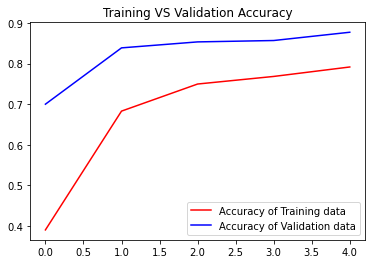

<Figure size 432x288 with 0 Axes>

In [17]:
epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training VS Validation Accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

## Loss

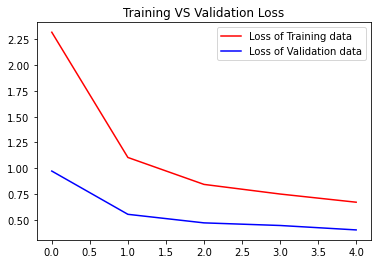

<Figure size 432x288 with 0 Axes>

In [18]:
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Training VS Validation Loss')
plt.legend(loc=0)
plt.figure()
plt.show()

## Proof testing

This section is quite possibly the most gratifying part of this entire project. Sometimes at least. 
Firstly, we declare the reverse mapping of breeds (see #Setup) to then map the different representations of breeds - using integers - to their respective indeces. A random, yet cherry-picked for the sake of **proof** testing, is then loaded in and passed to the model.

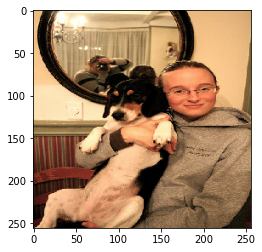

2022-01-17 20:11:15.991478: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Prediction is Beagle.


In [19]:
image=load_img("breeds/TRAIN/beagle/101.jpg",target_size=(256,256))
plt.imshow(image)
plt.show()

model = keras.models.load_model('models/model1.h5')

image=img_to_array(image) 
image=image/255.0
prediction_image=np.array(image)
prediction_image= np.expand_dims(image, axis=0)

def mapper(value):
    return reverse_mapping[value]

# PREDICTION

prediction=model.predict(prediction_image)
value=np.argmax(prediction)
move_name=mapper(value)
print(f"Prediction is {format(move_name).capitalize()}.")

## Serialisation

In order to make use of the functionality of the model it will be serialised as well as converted into a model which is able to be interpreted by the aforementioned React app. The TensorflowJS converter module will split up the model into one model.json as well as various weight files which will add their respective weights to the breeds. After this is done and dusted it is ready to be pushed straight to github in order for the raw model.json file to receive GET-requests.

In [20]:
#Uncomment to save model & to export it to a tsjs compatible format.
with open('frontend/src/data/mapping.json', 'w') as mapping:
    json.dump(reverse_mapping, mapping)

model.save('models/model1.h5')
tfjs.converters.save_keras_model(model, 'models/tfjs')

## Conclusion

With an 89% accuracy one might say that this model is pretty spot on. There are still some times where the Keras model predicts something completely different from the selected image yet the instances where this does happen are mainly caused by the fact that the image has bad lighting. This is a big issue since colour is one of the hyperparameters and if the colour is not visible the model has a big problem predicting.

To use the model in a more intuitive and usable environment I also chose to export the serialised version to a Keras H5-model as well a tensorflowjs model.
After that I built a frontend in ReactJS. Either you can go to [www.sennebels.xyz/pet_prediction](https://www.sennebels.xyz/pet_prediction) or build it from source by executing the follow commands:

```bash
cd frontend
npm install
npm start
```

after starting the frontend you'll be able to upload an image which will then send a request to the tensorflowjs model on github.

After surfing to the link or after setting up the frontend locally you can upload a picture from the TEST folder or from the TRAIN folder if you're into the whole data leaking thing.

The hardest parts of this project were:
- figuring out the premodeling as we did not see this during the AI-classes at AP.
- setting up the frontend and converting the model to a Javascript compatible counterpart.
- switching to my new laptop with ARM-architecture and reinstalling tensorflow.
